In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=8,8
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score, mean_squared_error
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
import os
os.listdir()

['.config', 'sample_data']

In [4]:
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

In [5]:
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [6]:
df.shape

(299, 13)

In [7]:
df.sample(5)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
135  75.0        0                       582         0                 40   
133  63.0        0                       193         0                 60   
24   75.0        0                       582         1                 30   
198  50.0        1                       582         1                 20   
184  58.0        1                       145         0                 25   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
135                    0  263358.03              1.18           137    1   
133                    1  295000.00              1.30           145    1   
24                     1  263358.03              1.83           134    0   
198                    1  279000.00              1.00           134    0   
184                    0  219000.00              1.20           137    1   

     smoking  time  DEATH_EVENT  
135        0   107            0  
133        1   107            0  
24         0    23            1  
198        0   186            0  
184        1   170            1

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [9]:
df.describe().T.style.background_gradient()

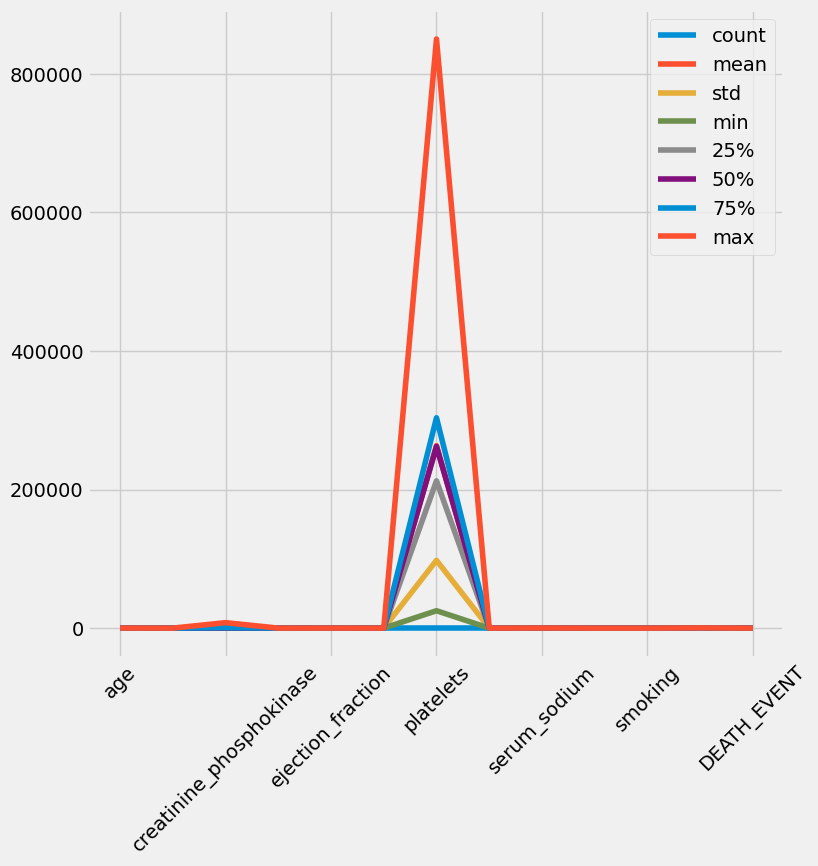

In [10]:
df.describe().T.plot()
plt.xticks(rotation=45)
plt.show()

In [11]:
df.duplicated().sum()

0

In [12]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Exploratory Data Analysis

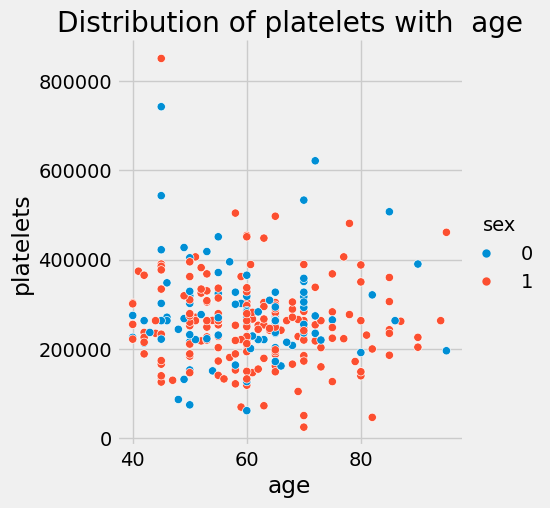

In [13]:
sns.relplot(x='age',y='platelets',hue='sex',data=df,color='#DC143C')
plt.title('Distribution of platelets with  age')
plt.show()

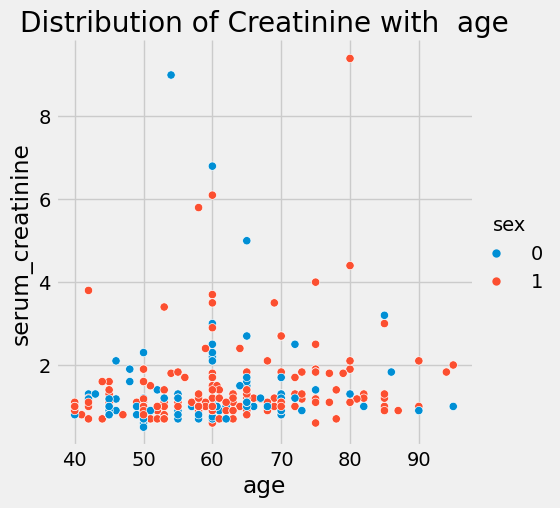

In [14]:
sns.relplot(x='age',y='serum_creatinine',hue='sex',data=df,color='#32CD32')
plt.title('Distribution of Creatinine with  age')
plt.show()

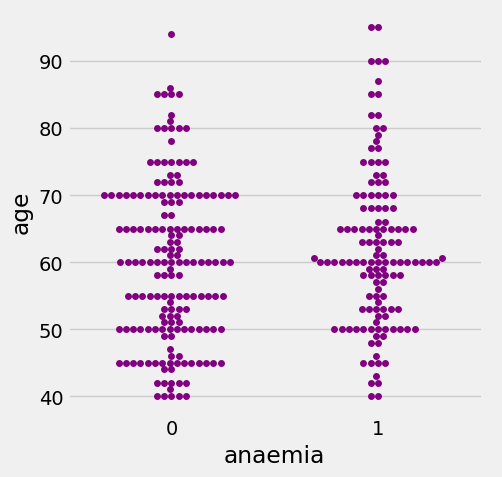

In [15]:
sns.catplot(x='anaemia',y='age',data=df,kind='swarm',color='#800080')
plt.show()

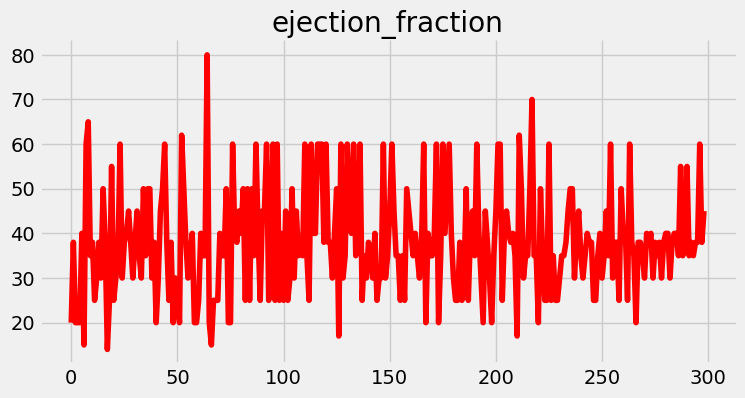

In [16]:

from matplotlib import pyplot as plt
df['ejection_fraction'].plot(kind='line', figsize=(8, 4), title='ejection_fraction',color='#FF0000')
plt.gca().spines[['top', 'right']].set_visible(False)

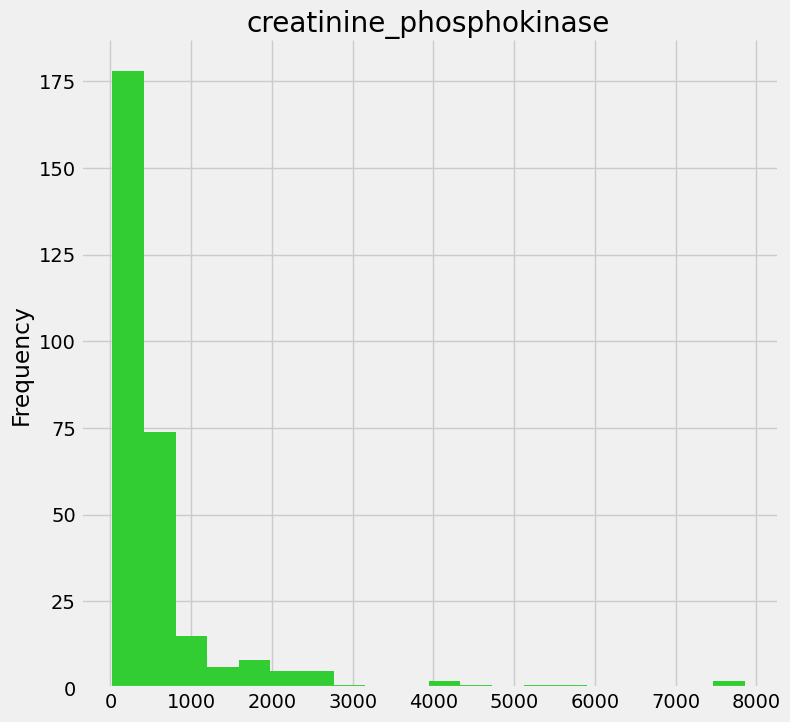

In [17]:
from matplotlib import pyplot as plt
df['creatinine_phosphokinase'].plot(kind='hist',ec='k',bins=20, title='creatinine_phosphokinase',color='#32CD32')
plt.gca().spines[['top', 'right',]].set_visible(False)

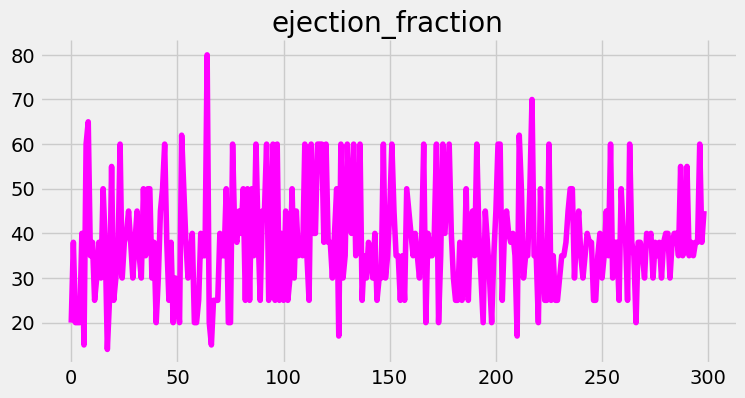

In [18]:
from matplotlib import pyplot as plt
df['ejection_fraction'].plot(kind='line', figsize=(8, 4), title='ejection_fraction',color='#FF00FF')
plt.gca().spines[['top', 'right']].set_visible(False)

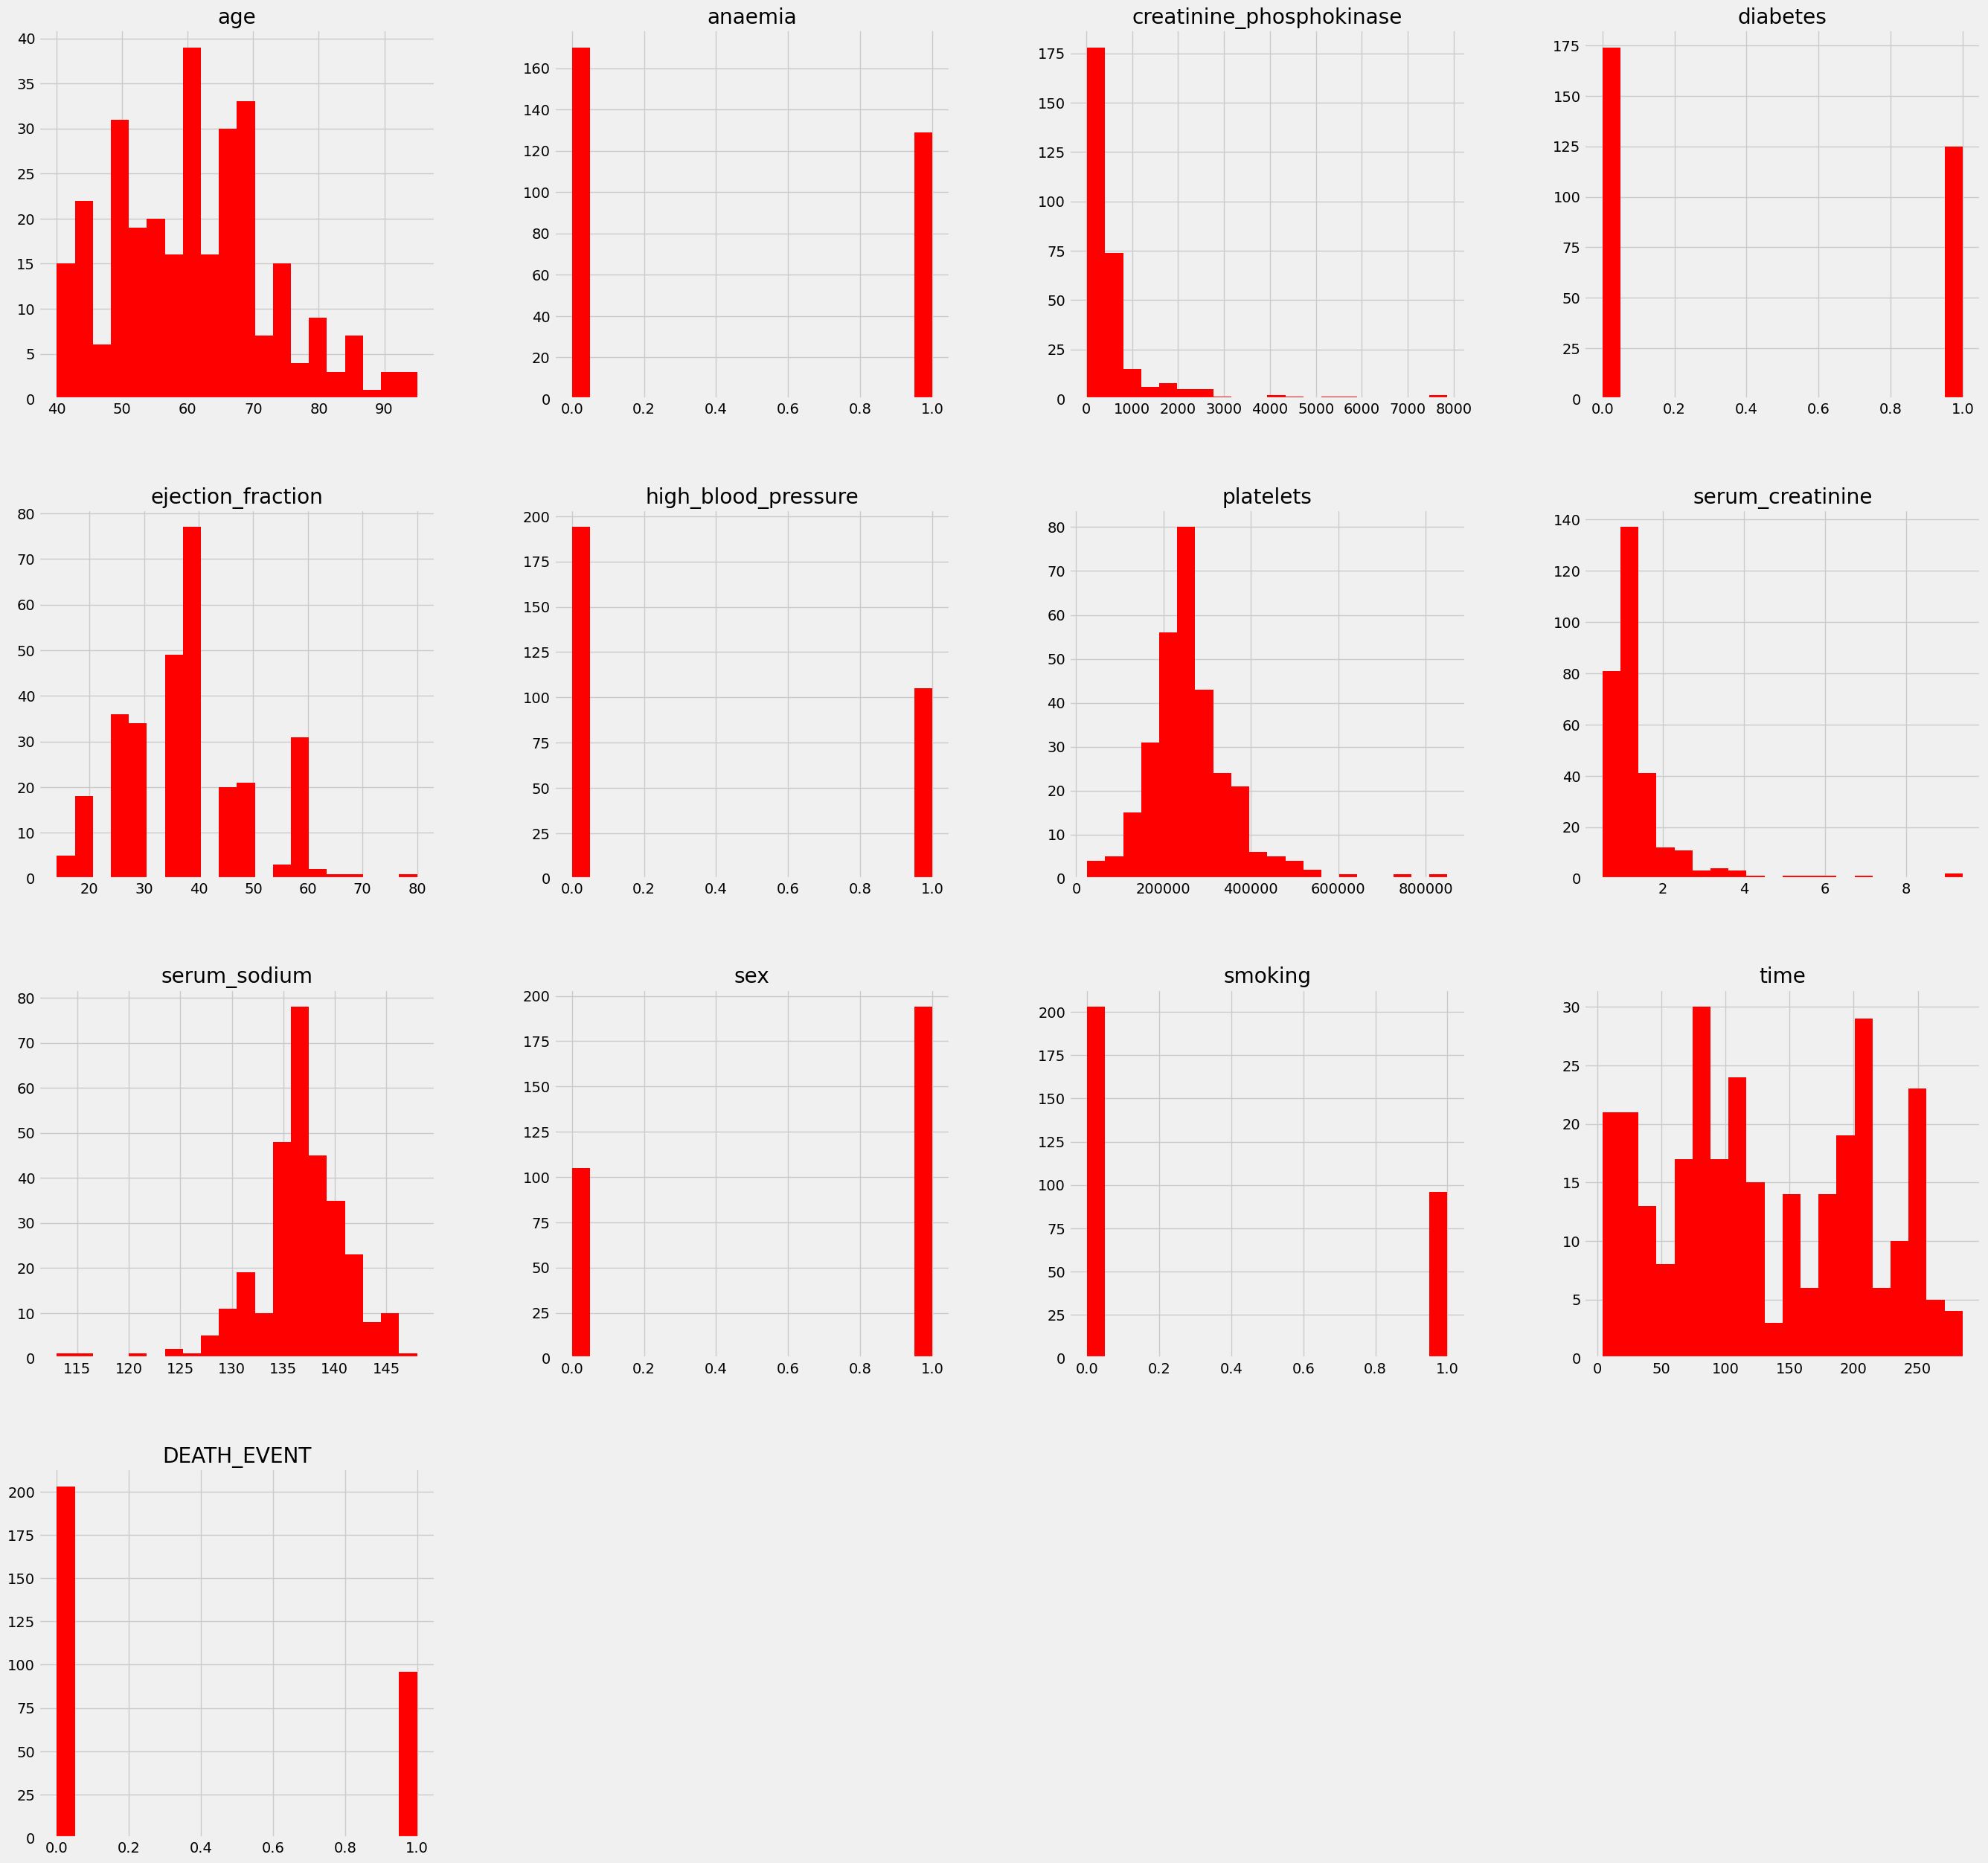

In [19]:
#Histogram

df.hist(bins=20, figsize=(30, 30),ec='k',color='red')
plt.show()

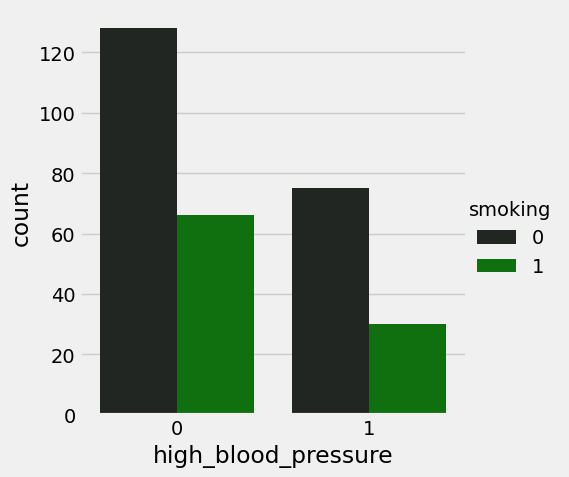

In [20]:
sns.catplot(hue='smoking',x='high_blood_pressure',data=df,kind='count',color='green')
plt.show()

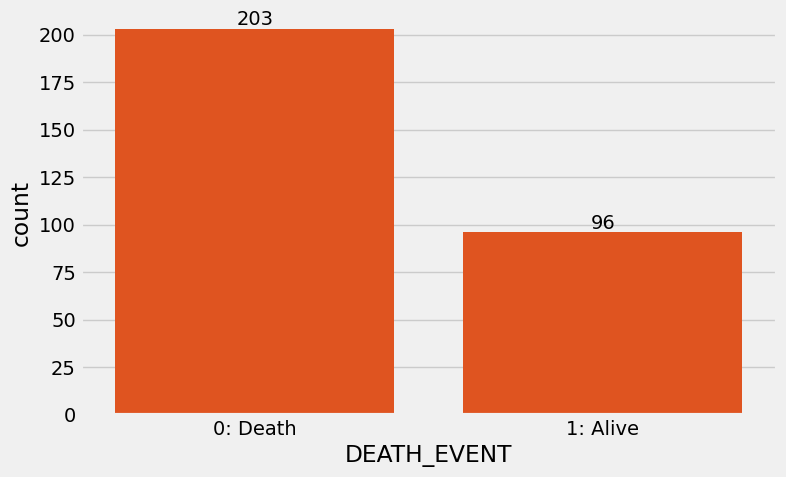

In [21]:
event_counts=df['DEATH_EVENT'].value_counts()

plt.figure(figsize=(8,5))
ax=sns.countplot(x=df['DEATH_EVENT'],color='#FF4500')
plt.gca().set_xticklabels(['0: Death', '1: Alive'])
ax.bar_label(ax.containers[0])
plt.show()

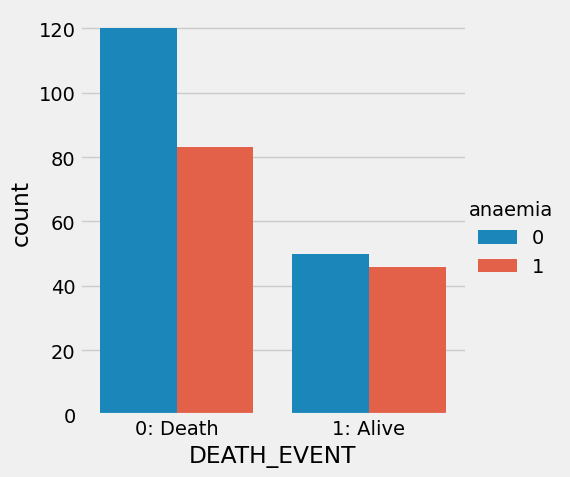

In [22]:
sns.catplot(x='DEATH_EVENT',hue='anaemia',kind='count',data=df)
plt.gca().set_xticklabels(['0: Death', '1: Alive'])
plt.show()

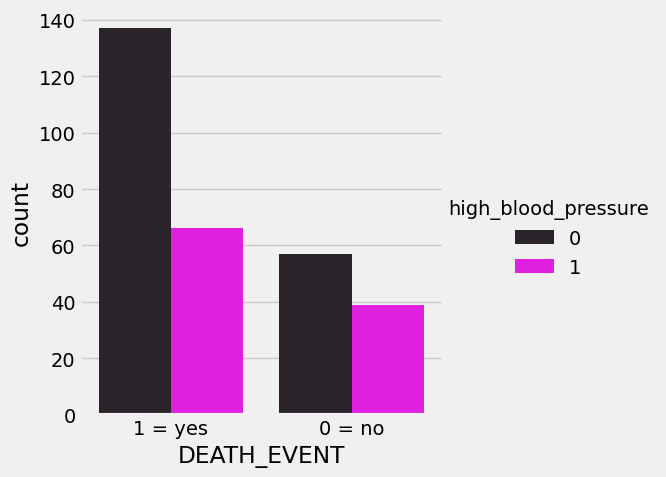

In [23]:
sns.catplot(x='DEATH_EVENT',hue='high_blood_pressure',kind='count',data=df,color='#FF00FF')
plt.gca().set_xticklabels(['1 = yes', '0 = no'])
plt.show()

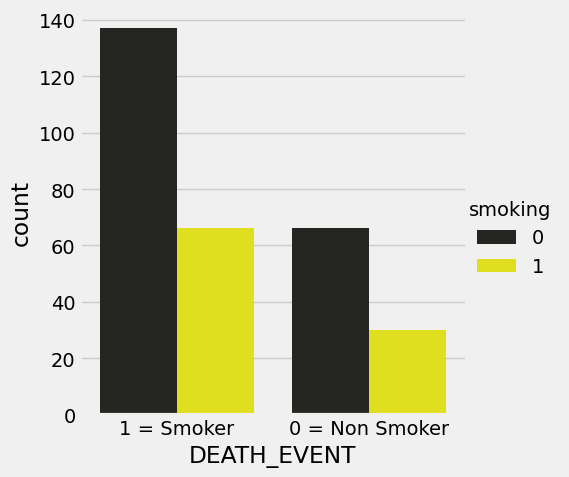

In [24]:
sns.catplot(x='DEATH_EVENT',hue='smoking',kind='count',data=df,color='yellow')
plt.gca().set_xticklabels(['1 = Smoker', '0 = Non Smoker'])
plt.show()

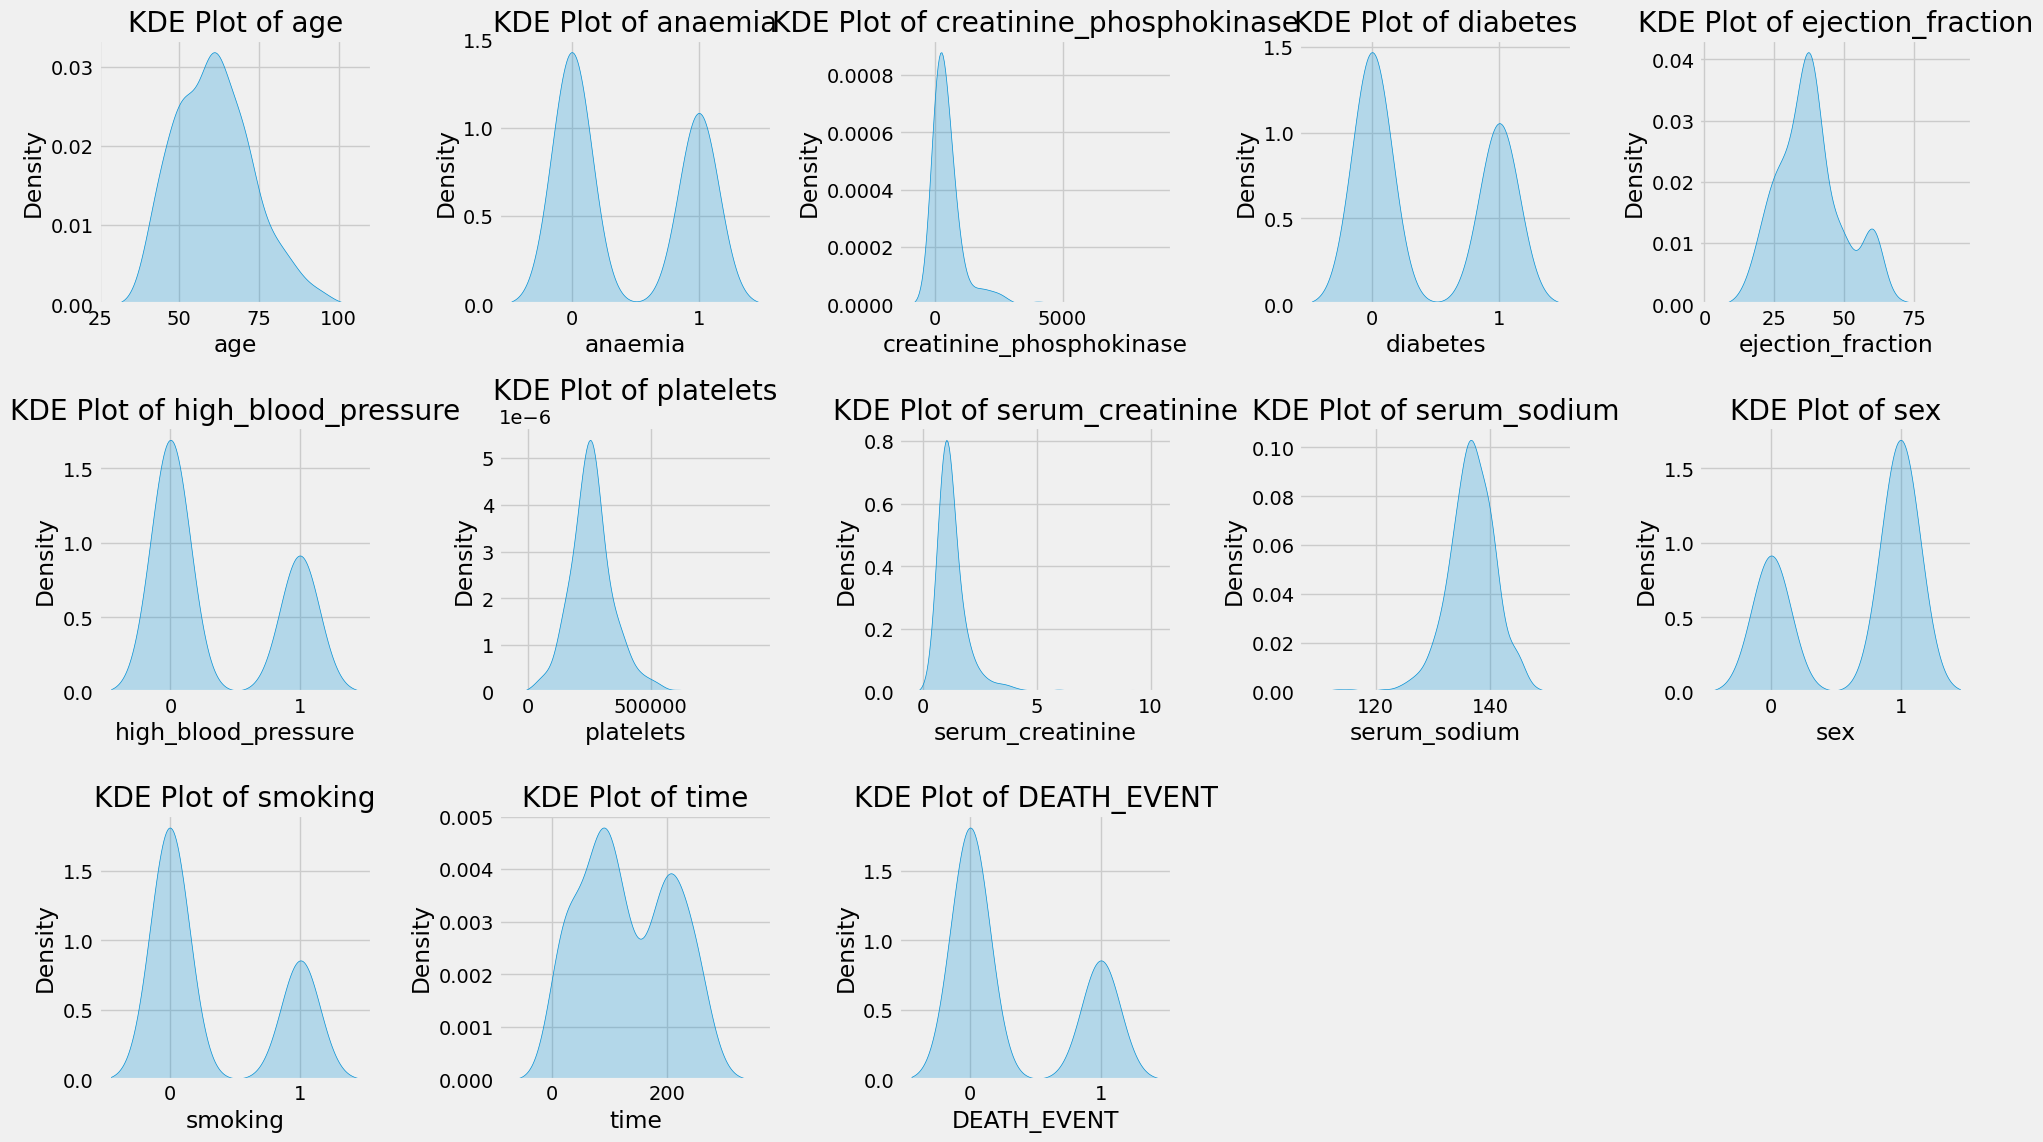

In [25]:
#kde-plot

columns=df.columns[0:17]
colors = sns.color_palette('husl', n_colors=len(columns))
plt.figure(figsize=(20, 15))
for i, col in enumerate(columns):
    plt.subplot(4, 5, i + 1)  # Create a grid of subplots (adjust grid size as needed)
    sns.kdeplot(data=df, x=col, fill=True)
    plt.title(f"KDE Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")

plt.tight_layout()
plt.show()

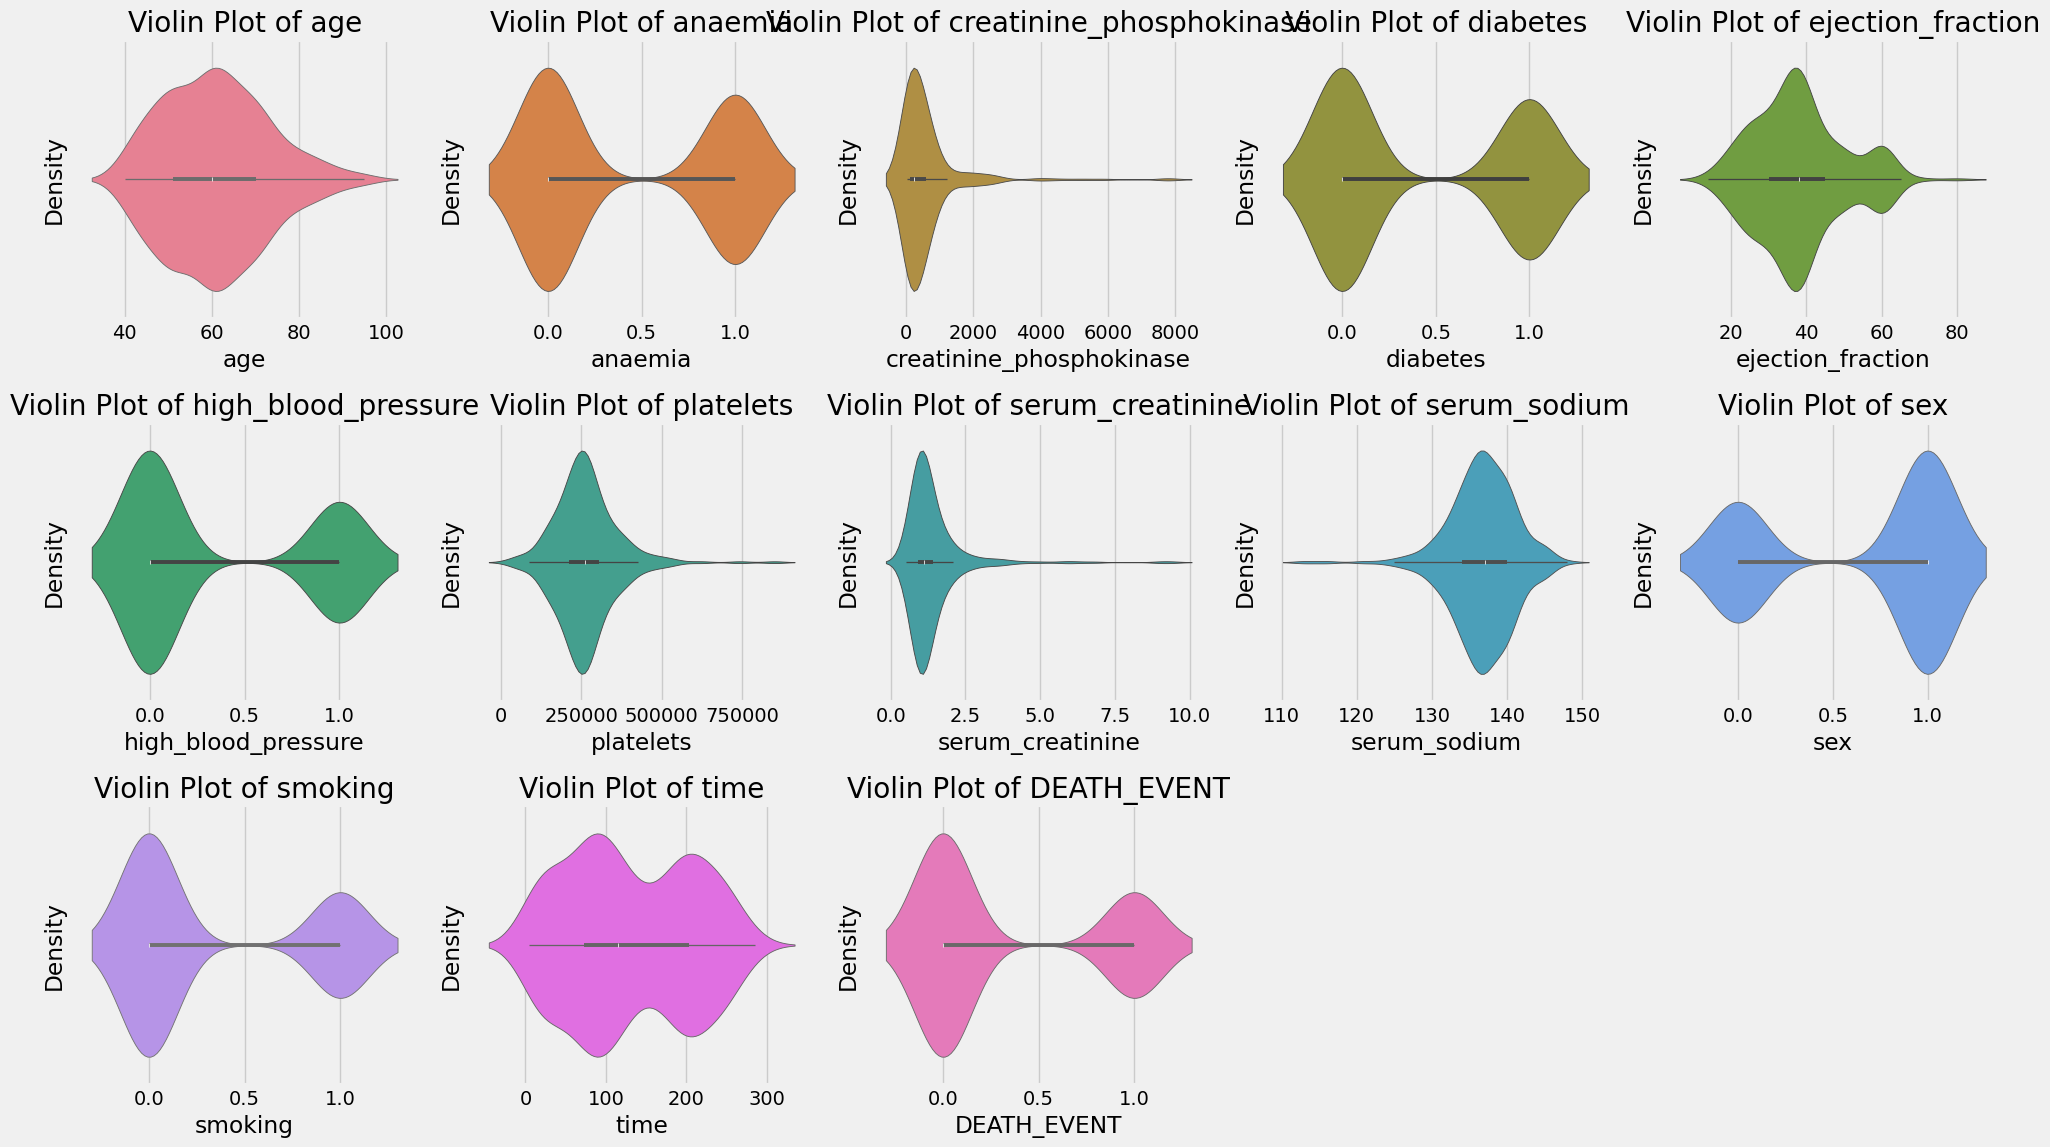

In [26]:
#violin-plot

columns = df.columns[0:13]

# List of colors for different plots (you can adjust/add more colors as needed)
colors = sns.color_palette('husl', n_colors=len(columns))

plt.figure(figsize=(20, 15))  # Set figure size

for i, col in enumerate(columns):
    plt.subplot(4, 5, i + 1)  # Create a grid of subplots (adjust grid size as needed)
    sns.violinplot(data=df, x=col, fill=True, color=colors[i % len(colors)])  # Apply color
    plt.title(f"Violin Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")

plt.tight_layout()
plt.show()

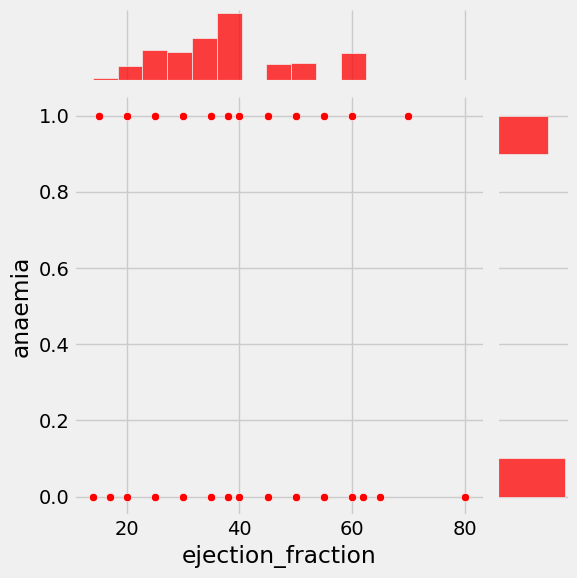

In [27]:
sns.jointplot(x='ejection_fraction',y='anaemia',data=df,color='#FF0000')
plt.show()

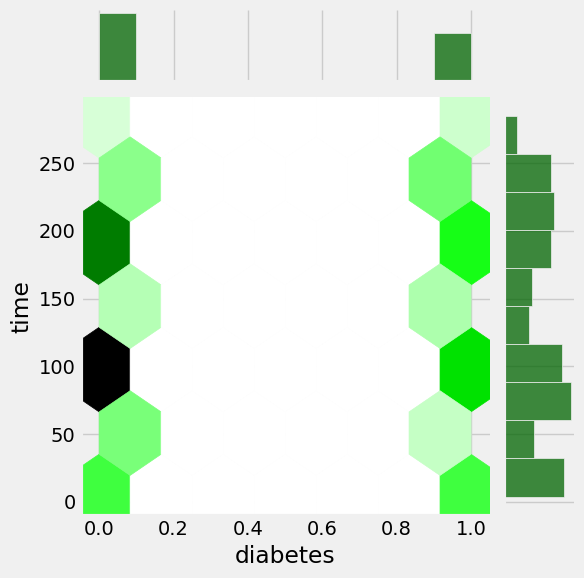

In [28]:
sns.jointplot(x='diabetes',y='time',kind='hex',data=df,color='#006400')
plt.show()

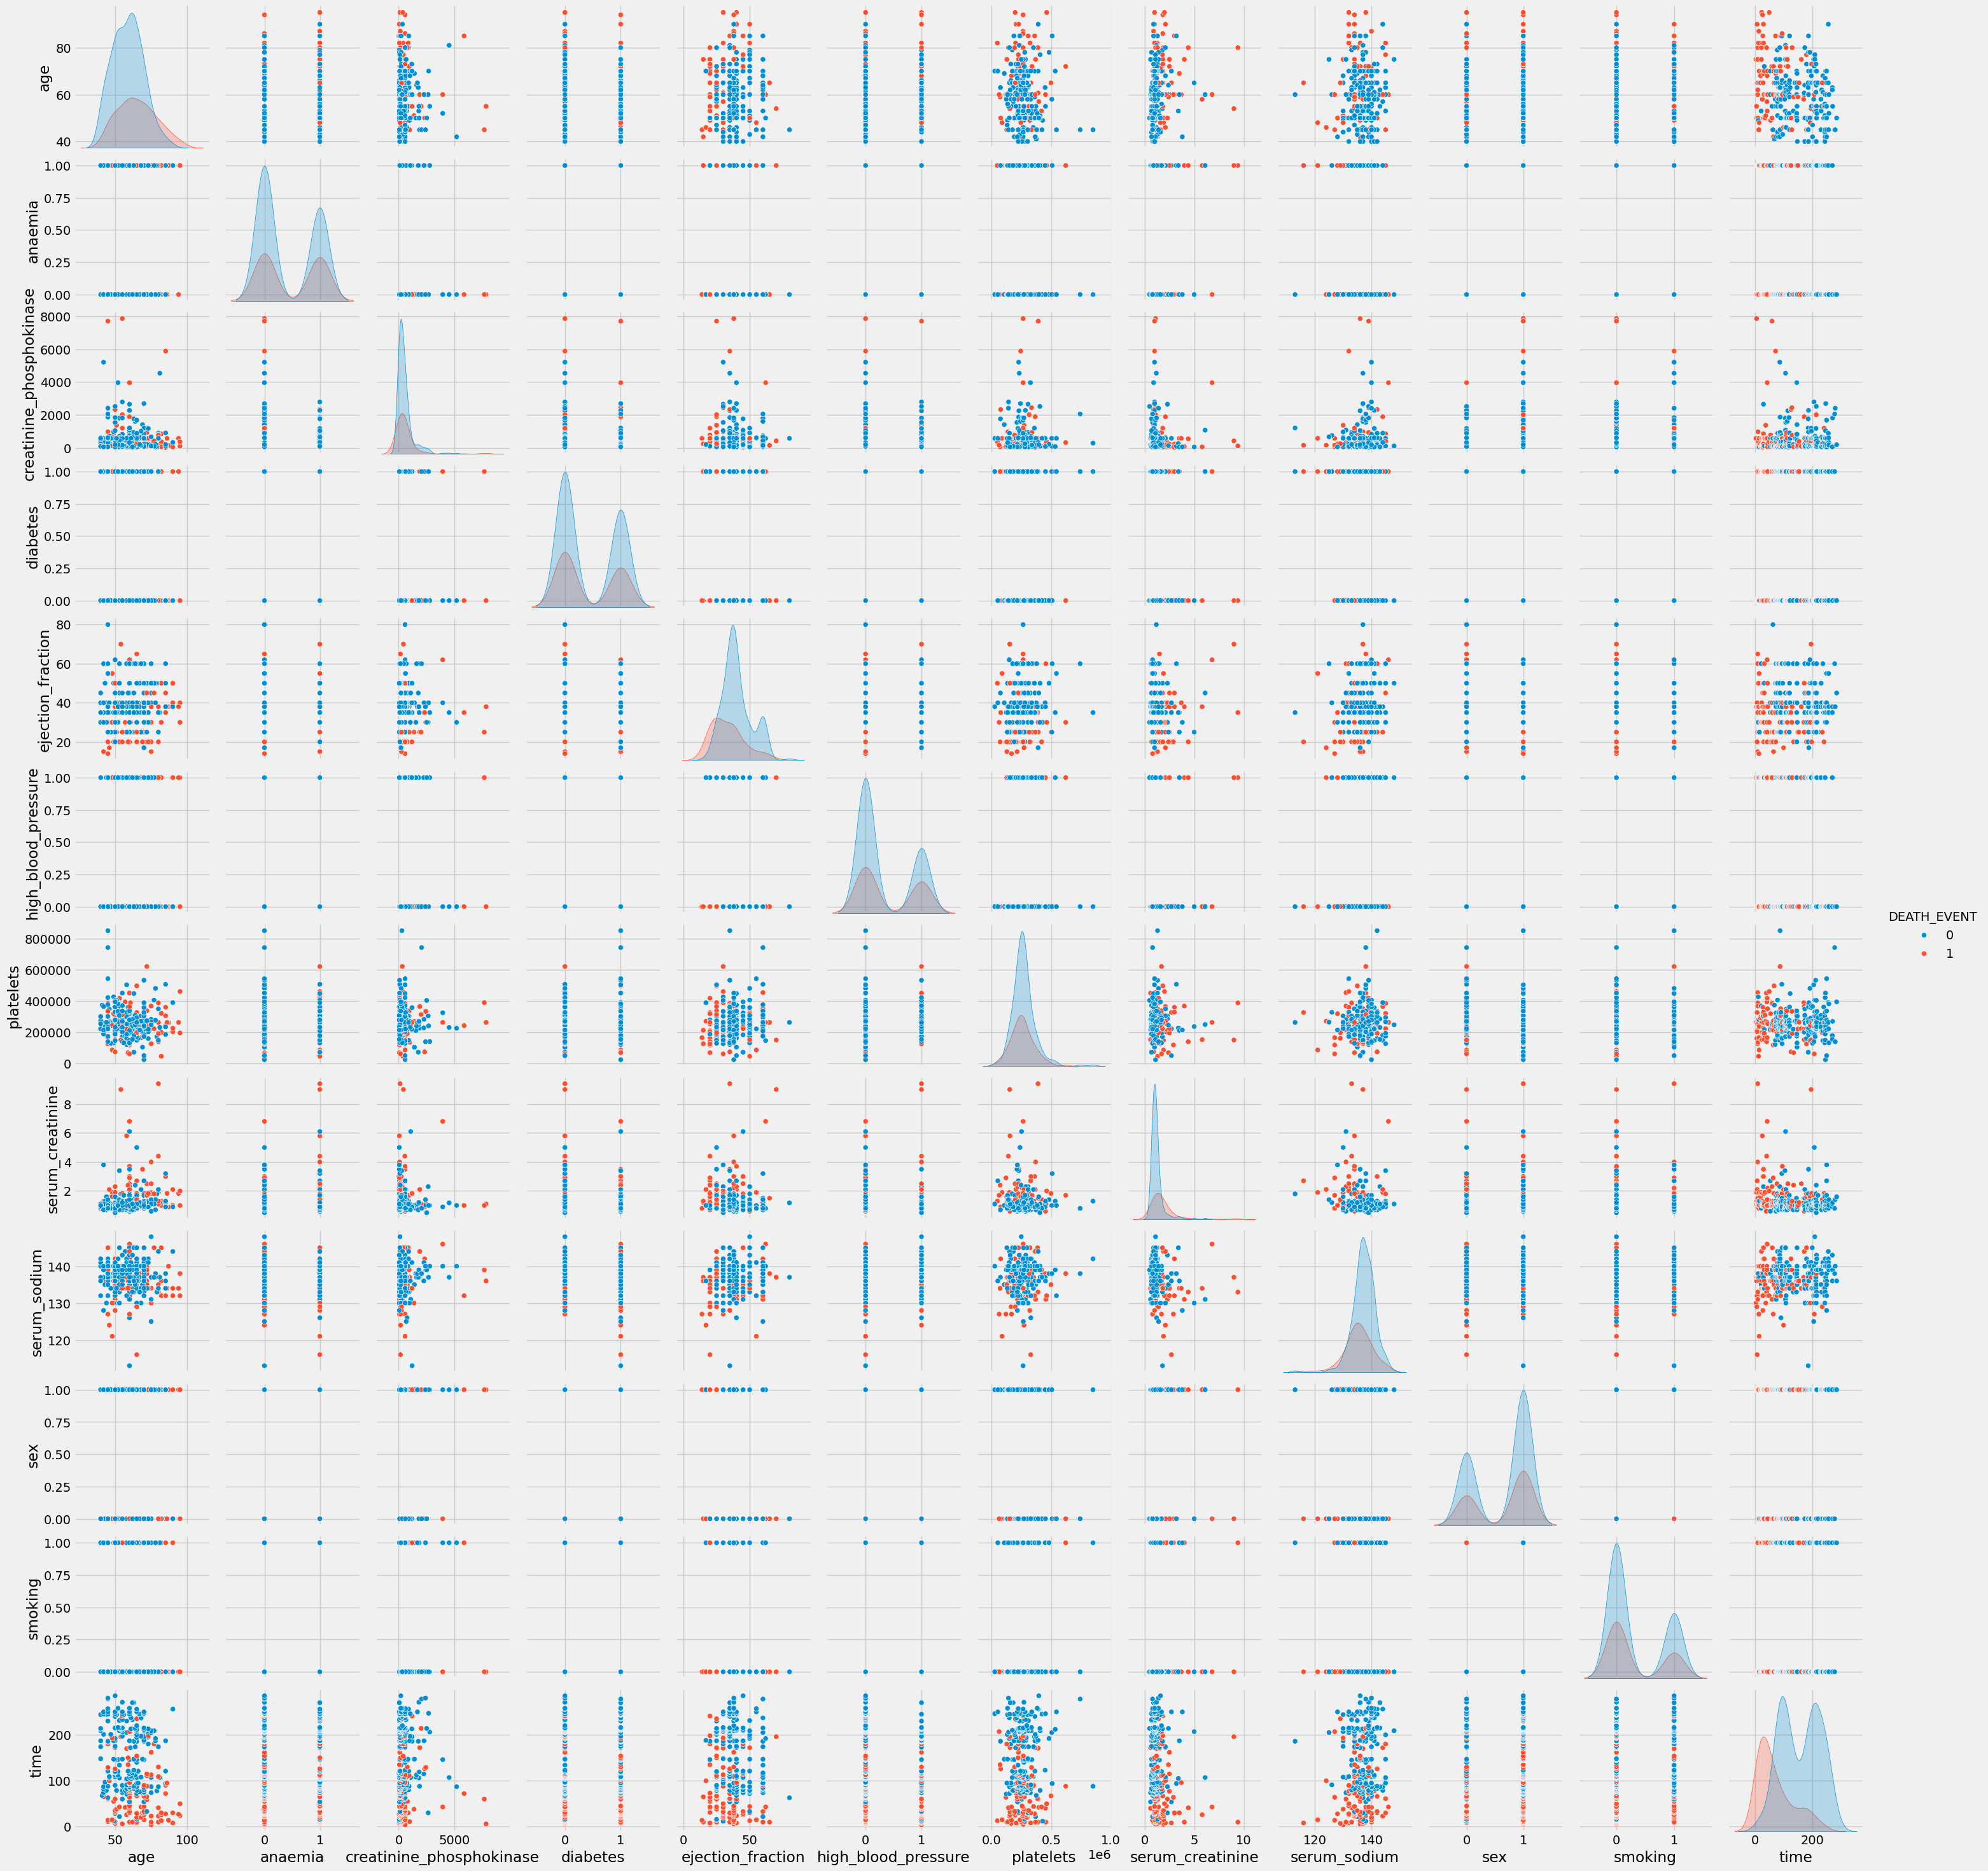

In [29]:
sns.pairplot(df,hue='DEATH_EVENT')
plt.show()

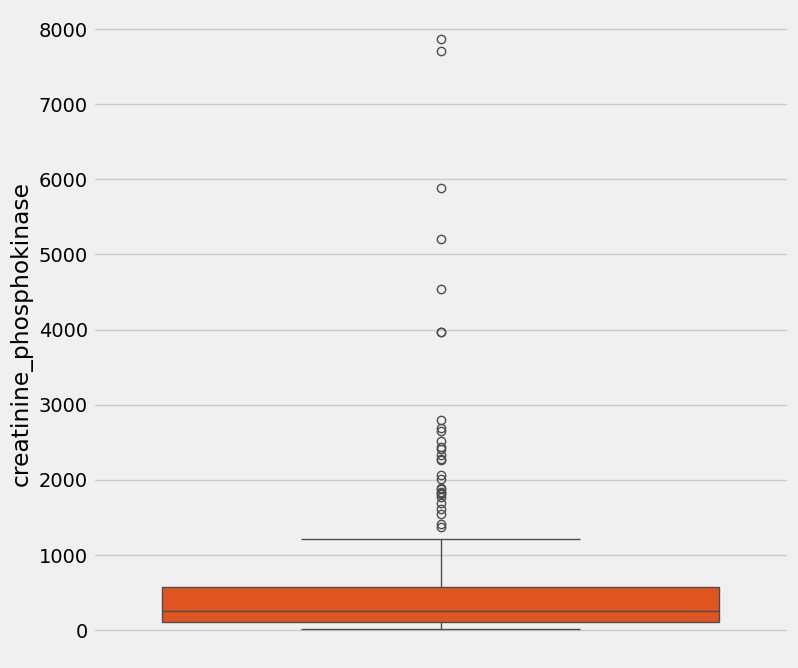

In [30]:
sns.boxplot(df['creatinine_phosphokinase'],color='#FF4500')
plt.show()

In [31]:
percentile25=df['creatinine_phosphokinase'].quantile(0.25)
percentile75=df['creatinine_phosphokinase'].quantile(0.75)
iqr=percentile75-percentile25
iqr

465.5

In [32]:
upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

#Finding Outliers
df[df['creatinine_phosphokinase']<lower_limit]
df[df['creatinine_phosphokinase']>upper_limit]
df['creatinine_phosphokinase']=np.where(
    df['creatinine_phosphokinase']>upper_limit,
    upper_limit,
    np.where(
        df['creatinine_phosphokinase']<lower_limit,
        lower_limit,
        df['creatinine_phosphokinase']
    )
)

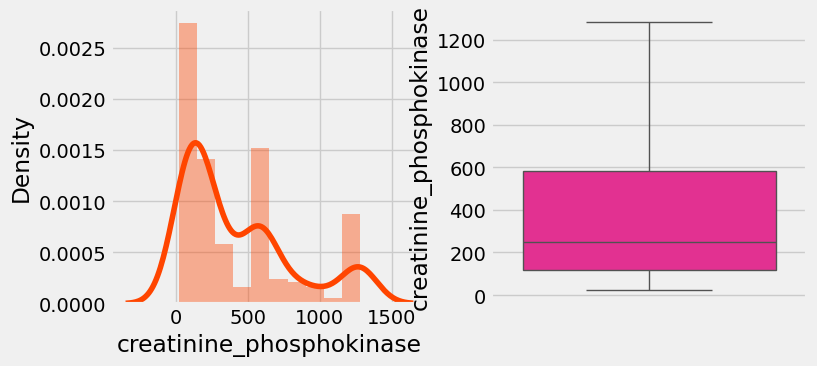

In [33]:
plt.subplot(2,2,1)
sns.distplot(df['creatinine_phosphokinase'],color='#FF4500')
plt.subplot(2,2,2)
sns.boxplot(df['creatinine_phosphokinase'],color='#FF1493')
plt.xticks(rotation=45)
plt.show()

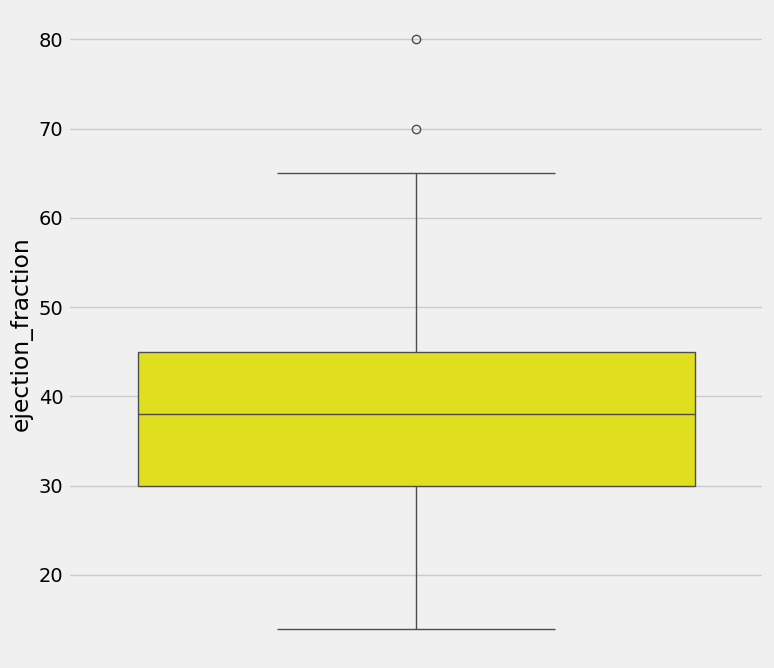

In [34]:
sns.boxplot(df['ejection_fraction'],color='yellow')
plt.show()

In [35]:
percentile25=df['ejection_fraction'].quantile(0.25)
percentile75=df['ejection_fraction'].quantile(0.75)
iqr=percentile75-percentile25
iqr

15.0

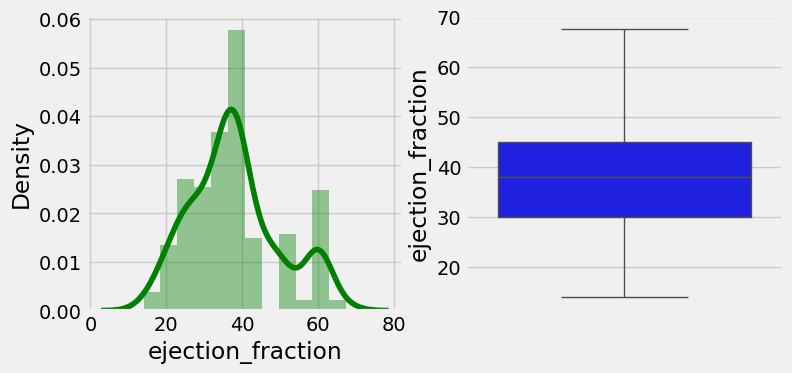

In [36]:
upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

#Finding Outliers
df[df['ejection_fraction']<lower_limit]
df[df['ejection_fraction']>upper_limit]
df['ejection_fraction']=np.where(
    df['ejection_fraction']>upper_limit,
    upper_limit,
    np.where(
        df['ejection_fraction']<lower_limit,
        lower_limit,
        df['ejection_fraction']
    )
)
plt.subplot(2,2,1)
sns.distplot(df['ejection_fraction'],color='green')
plt.subplot(2,2,2)
sns.boxplot(df['ejection_fraction'],color='blue')
plt.xticks(rotation=45)
plt.show()

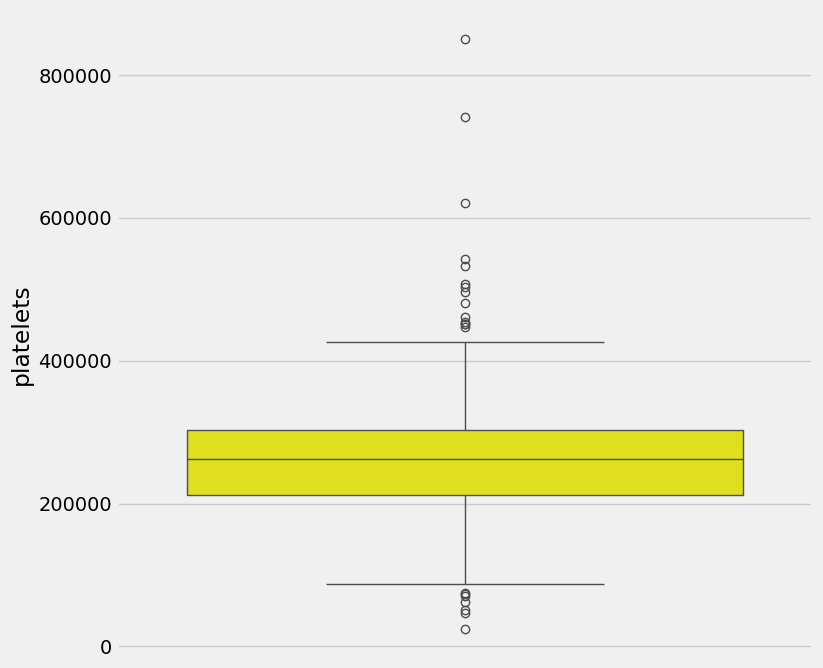

In [37]:
sns.boxplot(df['platelets'],color='yellow')
plt.show()

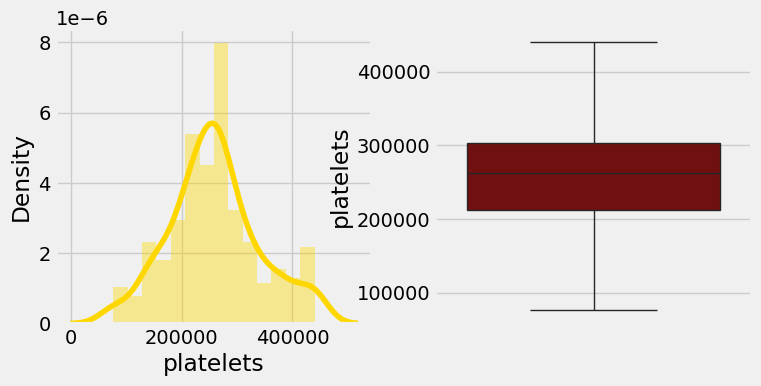

In [38]:
percentile25=df['platelets'].quantile(0.25)
percentile75=df['platelets'].quantile(0.75)
iqr=percentile75-percentile25

upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

#Finding Outliers
df[df['platelets']<lower_limit]
df[df['platelets']>upper_limit]
df['platelets']=np.where(
    df['platelets']>upper_limit,
    upper_limit,
    np.where(
        df['platelets']<lower_limit,
        lower_limit,
        df['platelets']
    )
)
plt.subplot(2,2,1)
sns.distplot(df['platelets'],color='#FFD700')
plt.subplot(2,2,2)
sns.boxplot(df['platelets'],color='#800000')
plt.xticks(rotation=45)
plt.show()

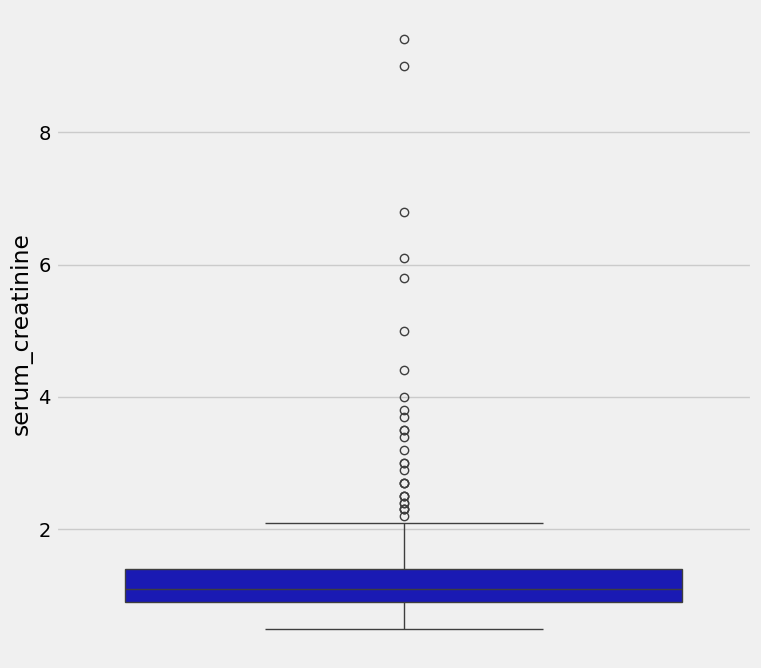

In [39]:
sns.boxplot(df['serum_creatinine'],color='#0000CD')
plt.show()

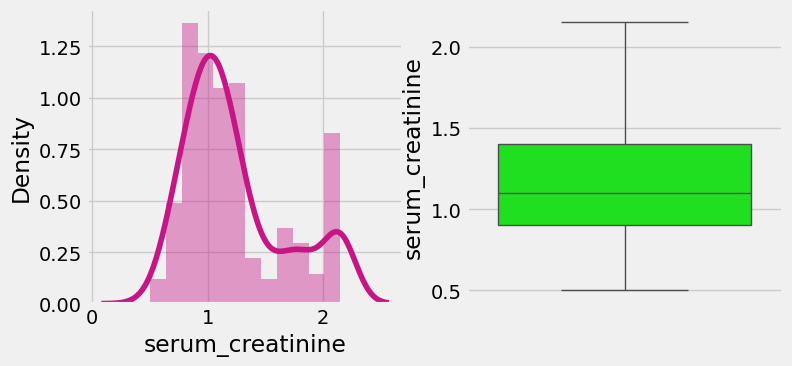

In [40]:
percentile25=df['serum_creatinine'].quantile(0.25)
percentile75=df['serum_creatinine'].quantile(0.75)
iqr=percentile75-percentile25

upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

#Finding Outliers
df[df['serum_creatinine']<lower_limit]
df[df['serum_creatinine']>upper_limit]
df['serum_creatinine']=np.where(
    df['serum_creatinine']>upper_limit,
    upper_limit,
    np.where(
        df['serum_creatinine']<lower_limit,
        lower_limit,
        df['serum_creatinine']
    )
)
plt.subplot(2,2,1)
sns.distplot(df['serum_creatinine'],color='#C71585')
plt.subplot(2,2,2)
sns.boxplot(df['serum_creatinine'],color='#00FF00')
plt.xticks(rotation=45)
plt.show()

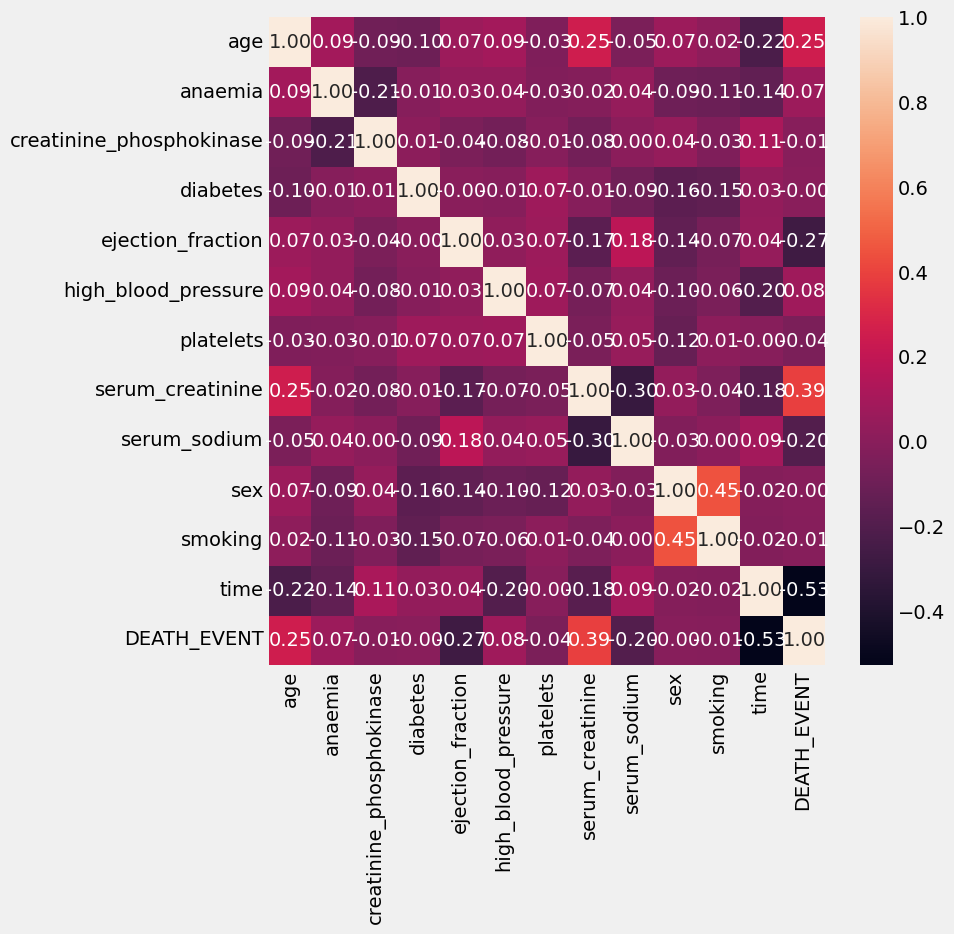

In [42]:
correlations=df.corr()
sns.heatmap(correlations,annot=True,fmt='0.2f')
plt.show()

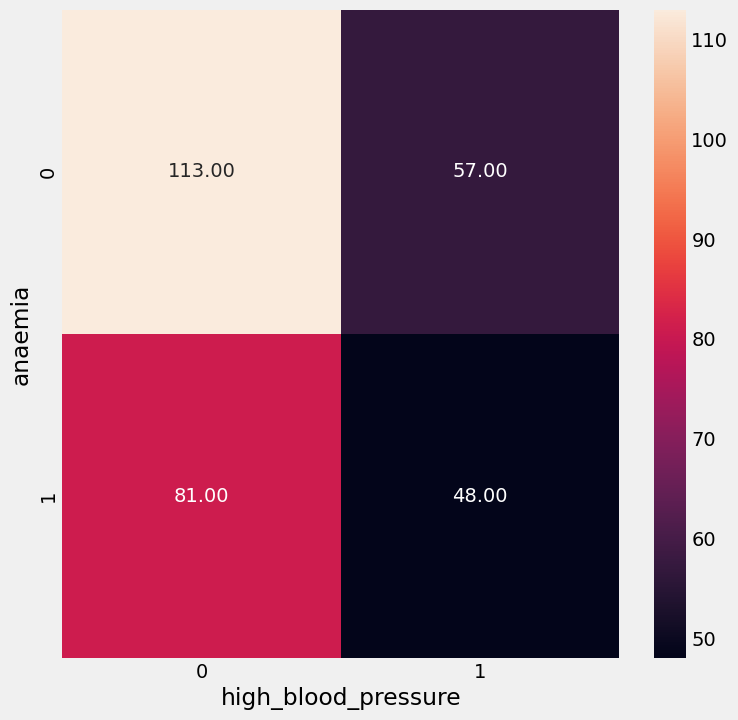

In [43]:
sns.heatmap(pd.crosstab(df['anaemia'],df['high_blood_pressure']),annot=True, fmt=".2f")
plt.show()

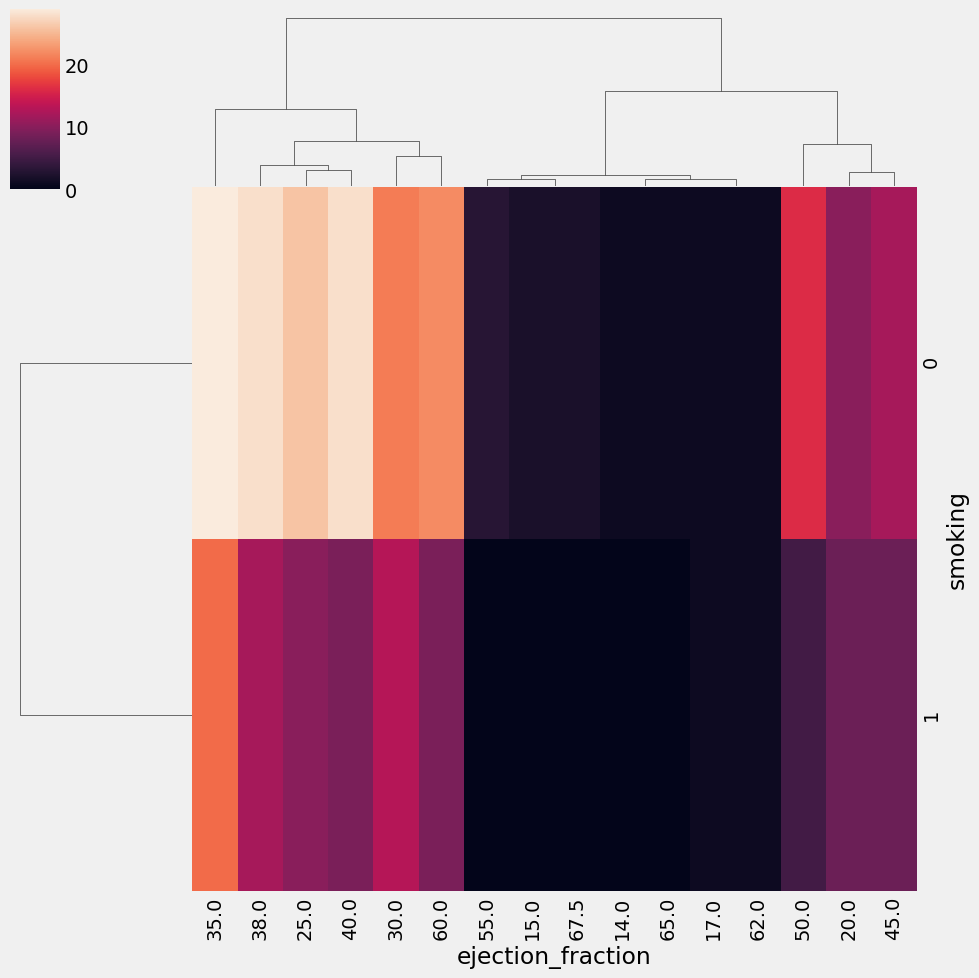

In [44]:
sns.clustermap(pd.crosstab(df['smoking'],df['ejection_fraction']))
plt.show()

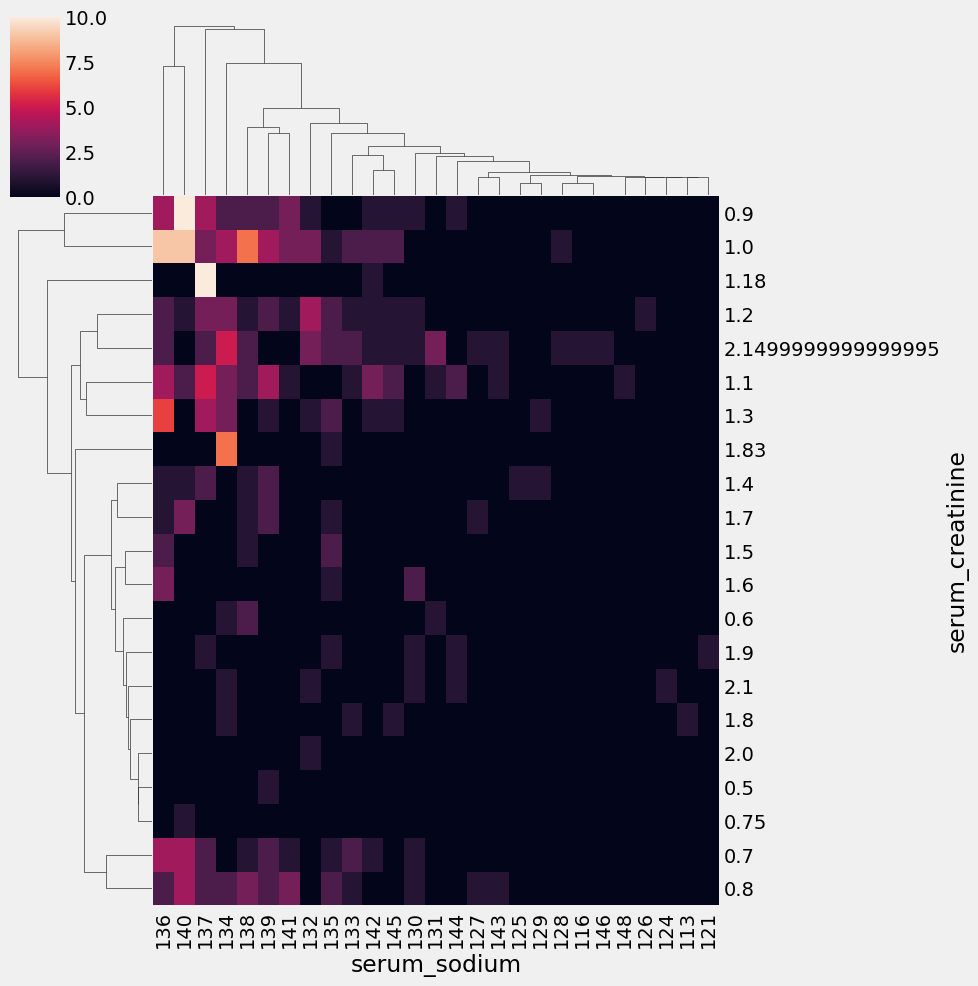

In [45]:
sns.clustermap(pd.crosstab(df['serum_creatinine'],df['serum_sodium']))
plt.show()

# Create new Dataframe

In [46]:
df_new=df[['anaemia', 'creatinine_phosphokinase', 'diabetes','ejection_fraction', 'high_blood_pressure', 'platelets','serum_creatinine', 'serum_sodium','smoking','DEATH_EVENT']]
df_new

anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0          0                    582.00         0               20.0   
1          0                   1280.25         0               38.0   
2          0                    146.00         0               20.0   
3          1                    111.00         0               20.0   
4          1                    160.00         1               20.0   
..       ...                       ...       ...                ...   
294        0                     61.00         1               38.0   
295        0                   1280.25         0               38.0   
296        0                   1280.25         1               60.0   
297        0                   1280.25         0               38.0   
298        0                    196.00         0               45.0   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  smoking  \
0                      1  265000.00              1.90           130        0   
1                      0  263358.03              1.10           136        0   
2                      0  162000.00              1.30           129        1   
3                      0  210000.00              1.90           137        0   
4                      0  327000.00              2.15           116        0   
..                   ...        ...               ...           ...      ...   
294                    1  155000.00              1.10           143        1   
295                    0  270000.00              1.20           139        0   
296                    0  440000.00              0.80           138        0   
297                    0  140000.00              1.40           140        1   
298                    0  395000.00              1.60           136        1   

     DEATH_EVENT  
0              1  
1              1  
2              1  
3              1  
4              1  
..           ...  
294            0  
295            0  
296            0  
297            0  
298            0  

[299 rows x 10 columns]

# Scaling

In [47]:
scaler = StandardScaler()
df_new[['anaemia', 'creatinine_phosphokinase', 'diabetes','ejection_fraction', 'high_blood_pressure', 'platelets','serum_creatinine', 'serum_sodium','smoking']] = scaler.fit_transform(df[['anaemia', 'creatinine_phosphokinase', 'diabetes','ejection_fraction', 'high_blood_pressure', 'platelets','serum_creatinine', 'serum_sodium','smoking']])
df_new.head(5)

anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0 -0.871105                  0.410040 -0.847579          -1.545801   
1 -0.871105                  2.224599 -0.847579          -0.002867   
2 -0.871105                 -0.723004 -0.847579          -1.545801   
3  1.147968                 -0.813959 -0.847579          -1.545801   
4  1.147968                 -0.686622  1.179830          -1.545801   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium   smoking  \
0             1.359272   0.071750          1.514665     -1.504036 -0.687682   
1            -0.735688   0.051564         -0.306161     -0.141976 -0.687682   
2            -0.735688  -1.194509          0.149046     -1.731046  1.454161   
3            -0.735688  -0.604408          1.514665      0.085034 -0.687682   
4            -0.735688   0.833964          2.083673     -4.682176 -0.687682   

   DEATH_EVENT  
0            1  
1            1  
2            1  
3            1  
4            1

# Train test split

In [48]:
x=df_new.drop(['DEATH_EVENT'],axis='columns')
y=df_new['DEATH_EVENT']

In [49]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)
X_train.shape, Y_train.shape

((239, 9), (239,))

# MLP using Sigmoid

In [58]:
# Define the MLP model
model = Sequential()
model.add(Dense(4, activation='sigmoid', input_dim=X_train.shape[1]))  # Input layer with 3 nodes
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=50, batch_size=16, validation_data=(X_test, Y_test), verbose=1)

# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train, Y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy and error
accuracy = accuracy_score(Y_test, y_pred)
error = mean_squared_error(Y_test, y_pred)

# Print results
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")
print(f"Overall Accuracy: {accuracy:.2f}")
print(f"Mean Squared Error: {error:.4f}")

# Extract and print weights and biases
for layer_index, layer in enumerate(model.layers):
    weights, biases = layer.get_weights()
    print(f"Layer {layer_index + 1} - Weights:")
    print(weights)
    print(f"Layer {layer_index + 1} - Biases:")
    print(biases)


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6927 - loss: 0.6018 - val_accuracy: 0.5833 - val_loss: 0.6743
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6481 - loss: 0.6215 - val_accuracy: 0.5833 - val_loss: 0.6673
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6998 - loss: 0.5592 - val_accuracy: 0.5833 - val_loss: 0.6642
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7394 - loss: 0.4955 - val_accuracy: 0.5833 - val_loss: 0.6566
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7107 - loss: 0.5398 - val_accuracy: 0.6167 - val_loss: 0.6454
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7190 - loss: 0.5347 - val_accuracy: 0.6667 - val_loss: 0.6400
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7386 - loss: 0.5324 - val_accuracy: 0.6833 - val_loss: 0.6360
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7915 - loss: 0.5125 - val_accuracy: 0.6833 - val_los

# MLP using relu

In [60]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))  # Input layer
model.add(Dropout(0.2))  # Dropout for regularization
model.add(Dense(16, activation='relu'))  # Hidden layer
model.add(Dropout(0.2))  # Dropout for regularization
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, Y_train,
    epochs=100,  # Increased epochs
    batch_size=16,
    validation_data=(X_test, Y_test),
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train, Y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy and error
accuracy = accuracy_score(Y_test, y_pred)
error = mean_squared_error(Y_test, y_pred)

# Print results
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")
print(f"Overall Accuracy: {accuracy:.2f}")
print(f"Mean Squared Error: {error:.4f}")

# Extract and print weights and biases
for layer_index, layer in enumerate(model.layers):
    if isinstance(layer, Dense): # Check if the layer is Dense layer
        weights, biases = layer.get_weights()
        print(f"Layer {layer_index + 1} - Weights:")
        print(weights)
        print(f"Layer {layer_index + 1} - Biases:")
        print(biases)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.4446 - loss: 0.7667 - val_accuracy: 0.5333 - val_loss: 0.6782
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6001 - loss: 0.6527 - val_accuracy: 0.6167 - val_loss: 0.6506
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6643 - loss: 0.6414 - val_accuracy: 0.6000 - val_loss: 0.6409
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7109 - loss: 0.6077 - val_accuracy: 0.6000 - val_loss: 0.6349
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7008 - loss: 0.6059 - val_accuracy: 0.6167 - val_loss: 0.6274
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7391 - loss: 0.5801 - val_accuracy: 0.6167 - val_loss: 0.6253
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7313 - loss: 0.5742 - val_accuracy: 0.6167 - val_loss: 0.6252
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7606 - loss: 0.5433 - val_accuracy: 0.6167 -

# ML Algos train

In [52]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
y_pred=lr.predict(X_test)
from sklearn.metrics import accuracy_score
ac=accuracy_score(Y_test,y_pred)
ac

0.6666666666666666

In [53]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier()
rc.fit(X_train,Y_train)
y_pred=rc.predict(X_test)
from sklearn.metrics import accuracy_score
ac=accuracy_score(Y_test,y_pred)
ac

0.6666666666666666

In [54]:
#SVC

from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,Y_train)
y_pred=sv.predict(X_test)

from sklearn.metrics import accuracy_score
ac=accuracy_score(Y_test,y_pred)
ac

0.65